In [22]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import simplstyles

from results import get_result_path

In [23]:
plt.style.use('nord-light-talk')

In [8]:
evs = pd.DataFrame()
for subject in range(1, 10):
    reading_path = os.path.join(get_result_path("reading", subject), "ev.csv")
    listening_path = os.path.join(get_result_path("listening", subject), "ev.csv")
    mean_reading_ev = pd.read_csv(reading_path)['# ev'].mean()
    mean_listening_ev = pd.read_csv(listening_path)['# ev'].mean()

    evs = pd.concat(
        [evs,
         pd.DataFrame(
             {
                 "subject": [subject],
                 "modality": ["reading"],
                 "ev": [mean_reading_ev]
             }
         ),
         pd.DataFrame(
             {
                 "subject": [subject],
                 "modality": ["listening"],
                 "ev": [mean_listening_ev]
             }
         )])
evs

,subject,modality,ev
0,1,reading,0.054605
0,1,listening,0.035747
0,2,reading,0.060194
0,2,listening,0.055664
0,3,reading,0.040664
0,3,listening,0.050083
0,4,reading,0.046086
0,4,listening,0.022301
0,5,reading,0.071461
0,5,listening,0.046376


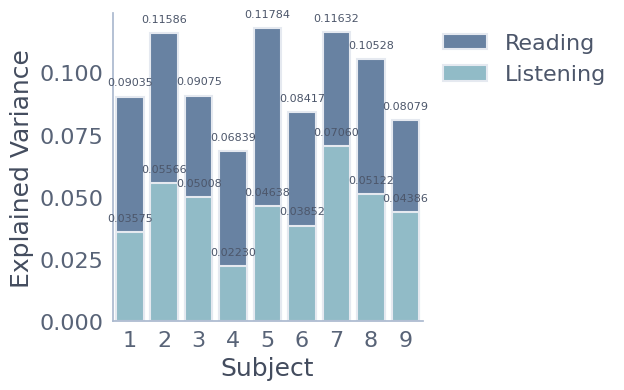

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.barplot(x="subject", y="ev", data=evs, estimator=sum, errorbar=None)
sns.barplot(x="subject", y="ev", data=evs[evs["modality"] == "listening"], estimator=sum, errorbar=None)

# add text to center of bars displaying the value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.xlabel("Subject")
plt.ylabel("Explained Variance")
plt.legend(["Reading", "Listening"], loc="upper left", bbox_to_anchor=(1, 1))